In [30]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [31]:
#Constants
Gna   = 30
Gkdr  = 15
Gkca  = 15
Gkahp = 0.8
Gca   = 10
Gl    = 0.1
Gc    = 2.1
Vna   = 60
Vk    = -75
Vca   = 80
Vl    = -60
p     = 0.5
Ca    = 0.21664282
Cm    = 1

Isapp = 0.3
Idapp = 0

In [35]:
def H(X):
    return 0 if X<0 else 1
    
def alphaM(Vs):
    return 0.32*(-46.9 - Vs)/(np.exp((-46.9 - Vs)/4.0) - 1.0)

def betaM(Vs):
    return 0.28*(Vs + 19.9)/(np.exp((Vs + 19.9)/5.0) - 1.0)

def alphaN(Vs):
    return (0.016*(-24.9 - Vs))/(np.exp((-24.9 - Vs)/5.0) - 1.0)

def betaN(Vs):
    return 0.25*np.exp(-1 - 0.025*Vs)

def alphaH(Vs):
    return 0.128*np.exp((-43 - Vs)/18)

def betaH(Vs):
    return 4.0/(1.0 + np.exp((-20.0 - Vs)/5.0))

def alphaS(Vd):
    return 1.6/(1 + np.exp(-0.072*(Vd - 5.0)))

def betaS(Vd):
    return 0.02*(Vd + 8.9)/(np.exp((Vd + 8.9)/5.0) - 1.0)

def alphaC(Vd):
    return (1 - H(Vd + 10.0)*np.exp((Vd + 50.0)/11.0 - (Vd + 53.5)/27.0)/18.975)\
           + H(Vd + 10.0)*(2*np.exp((-53.5 - Vd)/27.0))

def betaC(Vd):
    return (1 - H(Vd + 10.0))*(2*np.exp((-53.5 - Vd)/27.0) - alphaC(Vd))

def alphaQ(Ca):
    return min(0.00002*Ca,0.01)

def betaQ(Ca):
    return 0.001

# defining dX
def dVdt(V, t):
    Vs, Vd, m, n, h, s, c, q = V
    #print t, V
    
    #Equations for currents
    Ina    = Gna*m**2*h*(Vs - Vna) #Mi is minfinity
    Ikdr   = Gkdr*n*(Vs - Vk)
    Ica    = Gca*s**2*(Vd - Vca)
    Ikca   = Gkca*c*(1.073*np.sin(0.003453*Ca+0.08095)\
                + 0.08408*np.sin(0.01634*Ca-2.34)\
                + 0.01811*np.sin(0.0348*Ca-0.9918))*(Vd - Vk)
    Ikahp  = Gkahp*q*(Vd - Vk)
    Isd    = 0#Gc*(Vs - Vd)
    Ids    = -Isd
    Ileakd = Gl*(Vd - Vl)
    Ileaks = Gl*(Vs - Vl)

    dvsdt = (-Ileaks - Ina - Ikdr - Ids/p + Isapp/p)/Cm
    dvddt = (-Ileakd - Ica - Ikca - Ikahp - Isd/(1-p) + Idapp/(1-p))/Cm
    dmdt  = (((alphaM(Vs)/(alphaM(Vs) + betaM(Vs))) - m)/(1/(alphaM(Vs) + betaM(Vs))))
    dndt  = (((alphaN(Vs)/(alphaN(Vs) + betaN(Vs))) - n)/(1/(alphaN(Vs) + betaN(Vs))))
    dhdt  = (((alphaH(Vs)/(alphaH(Vs) + betaH(Vs))) - h)/(1/(alphaH(Vs) + betaH(Vs))))
    dsdt  = (((alphaS(Vd)/(alphaS(Vd) + betaS(Vd))) - s)/(1/(alphaS(Vd) + betaS(Vd))))
    dcdt  = (((alphaC(Vd)/(alphaC(Vd) + betaC(Vd))) - c)/(1/(alphaC(Vd) + betaC(Vd))))
    dqdt  = (((alphaQ(Ca)/(alphaQ(Ca) + betaQ(Ca))) - q)/(1/(alphaQ(Ca) + betaQ(Ca))))

    return dvsdt, dvddt, dmdt, dndt, dhdt, dsdt, dcdt, dqdt

In [36]:
tmin, tmax, dt = 0, 150, 0.01
T = np.arange(tmin,tmax,dt)

#Initital values need to be feeded
V0 = [-62.89223689, -62.98248752, 0.5, 0.00068604, 0.99806345, 0.01086703, 0.00809387, 0.0811213]

# solve the ODEs
sol = odeint(dVdt, V0, T)

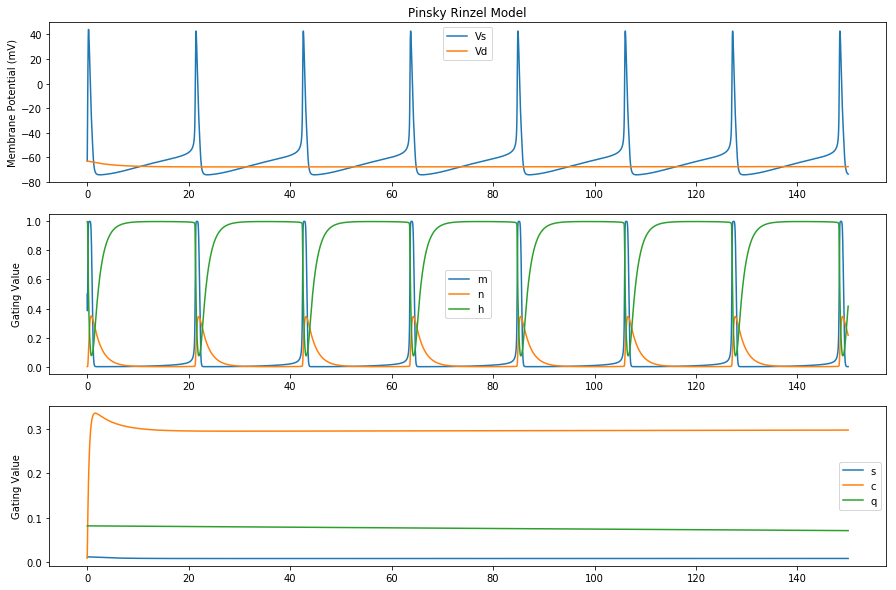

In [37]:
Vs, Vd, m, n, h, s, c, q = sol.T

plt.figure(figsize=(15, 10))

plt.subplot(3,1,1)
plt.title('Pinsky Rinzel Model')
plt.plot(T, Vs, label='Vs')
plt.plot(T, Vd, label='Vd')
plt.ylabel('Membrane Potential (mV)')
plt.legend()

plt.subplot(3,1,2)
plt.plot(T, m, label='m')
plt.plot(T, n, label='n')
plt.plot(T, h, label='h')
plt.ylabel('Gating Value')
plt.legend()

plt.subplot(3,1,3)
plt.plot(T, s, label='s')
plt.plot(T, c, label='c')
plt.plot(T, q, label='q')
plt.ylabel('Gating Value')
plt.legend()

plt.show()